# One Hot Encoder

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.DataFrame({
    'color': ['red', 'green', 'blue', 'green', 'blue', 'red']
})
df

,color
0,red
1,green
2,blue
3,green
4,blue
5,red


In [6]:
encoder = OneHotEncoder()
encoder.fit(df[['color']])
encoder.transform(df[['color']]).toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [9]:
encoded = encoder.fit_transform(df[['color']])

In [23]:
normalized_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())

In [22]:
encoder.get_feature_names_out()

array(['color_blue', 'color_green', 'color_red'], dtype=object)

In [27]:
scaled_df = pd.concat([normalized_df, df], axis=1)

In [28]:
scaled_df

,color_blue,color_green,color_red,color
0,0.0,0.0,1.0,red
1,0.0,1.0,0.0,green
2,1.0,0.0,0.0,blue
3,0.0,1.0,0.0,green
4,1.0,0.0,0.0,blue
5,0.0,0.0,1.0,red


In [29]:
scaled_df

,color_blue,color_green,color_red,color
0,0.0,0.0,1.0,red
1,0.0,1.0,0.0,green
2,1.0,0.0,0.0,blue
3,0.0,1.0,0.0,green
4,1.0,0.0,0.0,blue
5,0.0,0.0,1.0,red


In [30]:
df

,color
0,red
1,green
2,blue
3,green
4,blue
5,red


In [31]:
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (6, 3)>

In [33]:
scaled_df

,color_blue,color_green,color_red,color
0,0.0,0.0,1.0,red
1,0.0,1.0,0.0,green
2,1.0,0.0,0.0,blue
3,0.0,1.0,0.0,green
4,1.0,0.0,0.0,blue
5,0.0,0.0,1.0,red


In [34]:
ranking = {
    'red': 0,
    'green': 1,
    'blue': 2
}

In [36]:
df['color_map'] = df['color'].map(ranking)

In [37]:
df

,color,color_map
0,red,0
1,green,1
2,blue,2
3,green,1
4,blue,2
5,red,0


In [41]:
df.groupby(['color'], as_index=False)['color_map'].count()

,color,color_map
0,blue,2
1,green,2
2,red,2


In [43]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [44]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [45]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [50]:
df.isna().sum().value_counts()

0      11
2       2
177     1
688     1
Name: count, dtype: int64

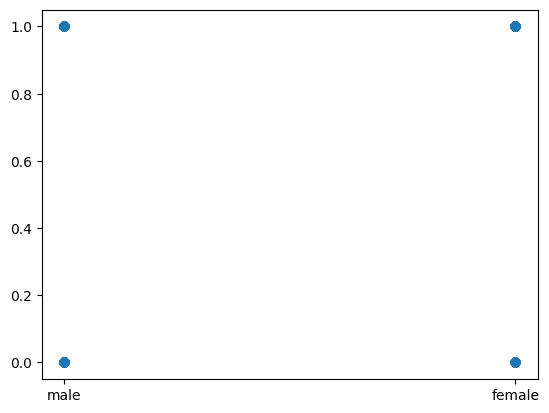

In [55]:
import matplotlib.pyplot as plt
plt.scatter(x=df['sex'], y=df['survived'])

# Label Encoding

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
# Applying LabelEncoder() on species columns 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoder_species'] = label_encoder.fit_transform(df['species'])
df[['species', 'label_encoder_species']]

,species,label_encoder_species
0,setosa,0
1,setosa,0
2,setosa,0
3,setosa,0
4,setosa,0
...,...,...
145,virginica,2
146,virginica,2
147,virginica,2
148,virginica,2


# Oridinal Encoding 

In [9]:
from sklearn.preprocessing import OrdinalEncoder

# creating sample dataset 
data = {
    'Student': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Grade': ['A', 'B', 'C', 'A', 'B']
}
df = pd.DataFrame(data)
df

,Student,Grade
0,Alice,A
1,Bob,B
2,Charlie,C
3,David,A
4,Eva,B


In [13]:
ordinal_encoder = OrdinalEncoder(categories=[['A', 'B', 'C']])
df['ordinal_grade'] = ordinal_encoder.fit_transform(df[['Grade']])
df

,Student,Grade,ordinal_grade
0,Alice,A,0.0
1,Bob,B,1.0
2,Charlie,C,2.0
3,David,A,0.0
4,Eva,B,1.0


# Target Guided Ordinal Encoding
- In this technique we will take help of our target variable to encode the categorical data
- This encoding technique is useful when we have a categorical variable with large number of unique categories and we want to use this variable as a feature in our ML model.
- In target guided ordinal Encoding, we replace each category in the categorical variable with a numerical value based on the mean or median of the target variable for that category. This creates a monotonic relationship between the categorical variable and the target variable, which can improve the predictive power of our model.

In [14]:
import pandas as pd

df = pd.DataFrame({'city': ['New York', 'London', 'Paris', 'Tokyo', 'New York', 'Paris'], 'price': [200,150, 300, 250, 180, 320]})
df.head()

,city,price
0,New York,200
1,London,150
2,Paris,300
3,Tokyo,250
4,New York,180


In [26]:
mean_map = df.groupby(['city'])['price'].mean().to_dict()

In [29]:
# The issue is that mean_map is a dictionary of dictionaries, but we need to map to the 'price' values
df['city_mean_map'] = df['city'].map(mean_map)
df.head()

,city,price,city_mean_map
0,New York,200,190.0
1,London,150,150.0
2,Paris,300,310.0
3,Tokyo,250,250.0
4,New York,180,190.0


In [28]:
mean_map

{'London': 150.0, 'New York': 190.0, 'Paris': 310.0, 'Tokyo': 250.0}